## Importing Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading Dataset

In [111]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Analyzing and Visualizing the data

In [112]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [113]:
df.shape

(545, 13)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [115]:
# Checking for missing values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [116]:
df.value_counts().head()

price    area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
1750000  2910   3         1          1        no        no         no        no               no               0        no        furnished           1
5229000  7085   3         1          1        yes       yes        yes       no               no               2        yes       semi-furnished      1
5110000  11410  2         1          2        yes       no         no        no               no               0        yes       furnished           1
5145000  3410   3         1          2        no        no         no        no               yes              0        no        semi-furnished      1
         7980   3         1          1        yes       no         no        no               no               1        yes       semi-furnished      1
Name: count, dtype: int64

In [117]:
# Statistical measures

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [118]:
# Correlation

correlation = df.select_dtypes(include='number').corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

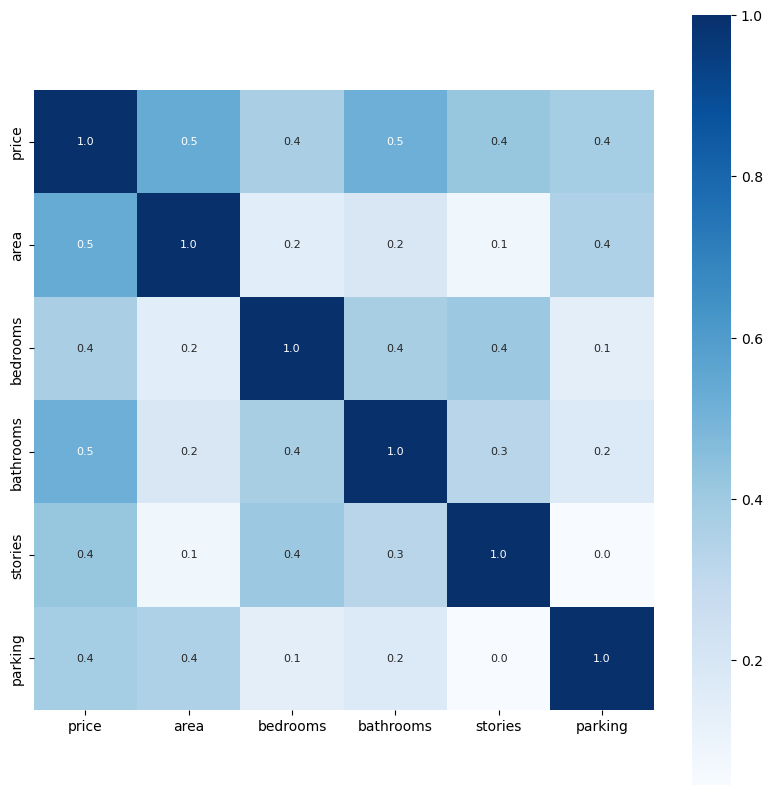

In [119]:
# Creating heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [120]:
# Splitting the data and target

X = df[['bedrooms', 'area']]
Y = df['price']

In [121]:
X

,bedrooms,area
0,4,7420
1,4,8960
2,3,9960
3,4,7500
4,4,7420
...,...,...
540,2,3000
541,3,2400
542,2,3620
543,3,2910


In [122]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

## Splitting data into test and train data

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
X_train

,bedrooms,area
46,3,6000
93,3,7200
335,2,3816
412,3,2610
471,3,3750
...,...,...
71,4,6000
106,4,5450
270,3,4500
435,2,4040


In [125]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [126]:
X_test

,bedrooms,area
316,4,5900
77,3,6500
360,2,4040
90,3,5000
493,3,3960
...,...,...
15,4,6000
357,4,6930
39,4,6000
54,3,6000


In [127]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

## Training the Model

In [128]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating and Predicting the model on training data

In [129]:
y_pred = model.predict(X_train)

In [130]:
y_pred

array([ 5064476.79059462,  5531547.66675221,  3518729.1289362 ,
        3745001.56544941,  4188718.89779912,  4679143.3177646 ,
        4227641.47081226,  4704832.21595327,  3966860.23162427,
        5072261.30519724,  3943506.68781639,  5030481.86476629,
        5453702.52072595,  4118658.26637548,  3201120.93314904,
        5239628.36915371,  3663264.16212183,  5487697.44655427,
        5618734.23030163,  8130540.154146  ,  5554901.21056009,
        3896799.60020063,  4753096.20648955,  5998618.54290981,
        5268820.29891356,  4149796.32478599,  3448279.27178243,
        4286025.33033196,  3823882.10135917,  4228676.86069575,
        4099196.97986892,  2748062.18327617,  3955183.45972033,
        4939924.55695259,  3564011.60093834,  5186172.15681882,
        3563100.86217117,  5227951.59724977,  4336624.67524903,
        7877543.42956064,  7187446.21003779,  6065822.30691563,
        5048907.76138936,  3850092.51258487,  4508919.38639031,
        4083627.95066366,  6577529.49092

In [131]:
# R Squared Error
score_1 = metrics.r2_score(y_train, y_pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, y_pred)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.3704406053828265
Mean Absolute Error: 1015508.628890948


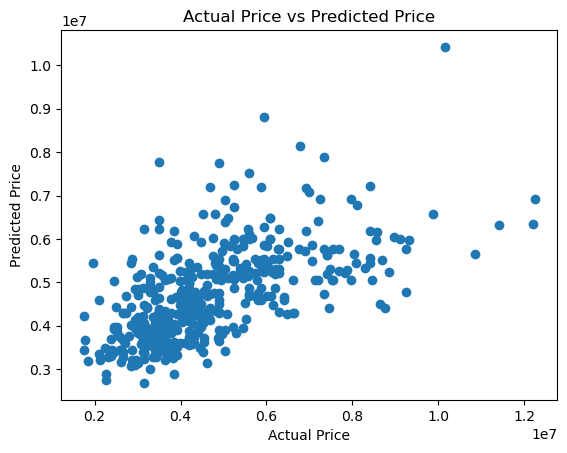

In [132]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Prediction on Test data

In [139]:
# accuracy for prediction on test data

y_test_pred = model.predict(X_test)
y_test_pred

array([5721232.88463307, 5259089.65566028, 3605915.69248562,
       4675251.06046329, 4270456.3011267 , 5344719.31628917,
       6045325.63052557, 5367037.47021356, 3294535.10838056,
       3780031.88116123, 6764357.84138504, 3564657.7650917 ,
       3481363.45884359, 3935722.17321376, 4274348.55842802,
       4142011.81018336, 2811895.20301771, 5064476.79059462,
       5006092.93107492, 4368798.12354303, 4683035.57506591,
       5385588.01795296, 3453728.43200427, 4208180.18430569,
       5940234.68339011, 6605810.68191468, 3236151.24886086,
       3896799.60020063, 7866902.04754019, 3201120.93314904,
       4286025.33033196, 3943506.68781639, 5064476.79059462,
       5303850.61462538, 5283353.93823532, 4519560.76841075,
       4537465.1519968 , 4662538.89867585, 4083627.95066366,
       4509573.18673424, 5835143.73625465, 3446333.14313177,
       5227951.59724977, 4363870.47635822, 4660717.42114152,
       4324037.16457792, 5064476.79059462, 5230808.4646676 ,
       5166710.87031225,

In [140]:
# R Squared Error
score_1 = metrics.r2_score(y_test, y_test_pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, y_test_pred)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.35104738175587247
Mean Absolute Error: 1381158.895411791
